In [ ]:
### depending on which directory you run your notebook from
### you could locate pyroma package like this

import sys
sys.path.append('/home/az/Projects/01_Curie/05_pyROMA/pyroma/')

In [1]:
import pyroma
roma = pyroma.ROMA()
roma

scROMA

In [3]:
import os
import zipfile
import io
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
from glob import glob

In [8]:
print(os.getcwd())

/home/az/Downloads/pyroma_tutorial/pyroma


In [9]:
datasets_dir = "datasets"

adata = sc.read_h5ad(os.path.join(datasets_dir, "rna_10xpmbc3k.h5ad"))
adata


AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'celltype'
    var: 'gene_ids'

### standard preprocessing

In [12]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

### run pyroma

In [16]:
import time

genesets_dir = "genesets"
roma.gmt =os.path.join(genesets_dir, "h.all.v2023.1.Hs.symbols.gmt")

roma.adata = adata
roma.pc_sign_mode = 'UseMeanExpressionAllWeights'
pathways_to_check = 'all' #['HALLMARK_NOTCH_SIGNALING', 'HALLMARK_PANCREAS_BETA_CELLS', 'HALLMARK_TGF_BETA_SIGNALING' ] 

iters = 5

start = time.time()
roma.compute(pathways_to_check, 
             parallel=True,
             loocv_on=True,
            iters=iters,
            )
end = time.time()

minutes, seconds = divmod(end - start, 60)
print(f"CPU Parallel {iters} iterations for shape {adata.shape}, running time (min): " + "{:0>2}:{:05.2f}".format(int(minutes),seconds))


Processing gene set: HALLMARK_NOTCH_SIGNALING | len of subsetlist:  25 
Processing gene set: HALLMARK_HEDGEHOG_SIGNALING | len of subsetlist:  17 
Processing gene set: HALLMARK_ANGIOGENESIS | len of subsetlist:  15 
Processing gene set: HALLMARK_PANCREAS_BETA_CELLS | len of subsetlist:  14 
Processing gene set: HALLMARK_WNT_BETA_CATENIN_SIGNALING | len of subsetlist:  33 
Processing gene set: HALLMARK_APICAL_SURFACE | len of subsetlist:  26 
Processing gene set: HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY | len of subsetlist:  47 
Processing gene set: HALLMARK_TGF_BETA_SIGNALING | len of subsetlist:  47 
Processing gene set: HALLMARK_MYC_TARGETS_V2 | len of subsetlist:  57 
Processing gene set: HALLMARK_CHOLESTEROL_HOMEOSTASIS | len of subsetlist:  61 
Processing gene set: HALLMARK_IL6_JAK_STAT3_SIGNALING | len of subsetlist:  71 
Processing gene set: HALLMARK_PROTEIN_SECRETION | len of subsetlist:  88 
Processing gene set: HALLMARK_INTERFERON_ALPHA_RESPONSE | len of subsetlist:  93 
Proc

In [19]:
roma

scROMA: module activities are computed

In [20]:
roma.adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'celltype', 'n_genes'
    var: 'gene_ids', 'n_cells'
    uns: 'log1p', 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

### all the pyroma statistics

In [ ]:
roma.adata.uns['ROMA_stats']

,L1,ppv L1,Median Exp,ppv Med Exp,q L1,q Med Exp
HALLMARK_NOTCH_SIGNALING,0.308422,0.4,-0.046337,0.500000,0.769231,0.806452
HALLMARK_HEDGEHOG_SIGNALING,0.436227,0.2,-0.043306,0.666667,0.476190,1.000000
HALLMARK_ANGIOGENESIS,0.682129,0.0,-0.092545,0.333333,0.000000,0.757576
HALLMARK_PANCREAS_BETA_CELLS,0.329635,0.2,-0.002735,1.000000,0.476190,1.000000
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.168701,1.0,0.027317,0.833333,1.000000,1.000000
HALLMARK_APICAL_SURFACE,0.273708,0.4,0.015345,1.000000,0.769231,1.000000
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,0.295123,0.2,0.010931,1.000000,0.476190,1.000000
HALLMARK_TGF_BETA_SIGNALING,0.234388,0.4,-0.024408,1.000000,0.769231,1.000000
HALLMARK_MYC_TARGETS_V2,0.190350,0.6,0.193092,0.166667,0.857143,0.595238
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.223409,0.4,-0.100565,0.333333,0.769231,0.757576


### active pathways

In [22]:
roma.adata.uns['ROMA_active_modules'].sort_values(by='Median Exp')

,L1,ppv L1,Median Exp,ppv Med Exp,q L1,q Med Exp
HALLMARK_HYPOXIA,0.150901,0.0,-0.105618,0.166667,0.0,0.595238
HALLMARK_P53_PATHWAY,0.184979,0.0,-0.104430,0.166667,0.0,0.595238
HALLMARK_ANGIOGENESIS,0.682129,0.0,-0.092545,0.333333,0.0,0.757576
HALLMARK_KRAS_SIGNALING_UP,0.191552,0.0,-0.083000,0.166667,0.0,0.595238
HALLMARK_ESTROGEN_RESPONSE_LATE,0.262778,0.0,-0.074091,0.166667,0.0,0.595238
HALLMARK_APOPTOSIS,0.148120,0.0,-0.064821,0.166667,0.0,0.595238
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.268412,0.0,-0.062662,0.333333,0.0,0.757576
HALLMARK_INFLAMMATORY_RESPONSE,0.116391,0.0,-0.059195,0.166667,0.0,0.595238
HALLMARK_FATTY_ACID_METABOLISM,0.153207,0.0,-0.055761,0.166667,0.0,0.595238
HALLMARK_ALLOGRAFT_REJECTION,0.212134,0.0,-0.025685,1.000000,0.0,1.000000


### visualize results

In [23]:
sc.pp.pca(roma.adata)
sc.pp.neighbors(roma.adata)
sc.tl.umap(roma.adata)

In [25]:
adata.obs

,celltype,n_genes
AAACATACAACCAC-1,CD4 T,781
AAACATTGAGCTAC-1,B,1352
AAACATTGATCAGC-1,CD4 T,1131
AAACCGTGCTTCCG-1,CD14 Monocytes,960
AAACCGTGTATGCG-1,NK,522
...,...,...
TTTCGAACTCTCAT-1,CD14 Monocytes,1155
TTTCTACTGAGGCA-1,B,1227
TTTCTACTTCCTCG-1,B,622
TTTGCATGAGAGGC-1,B,454


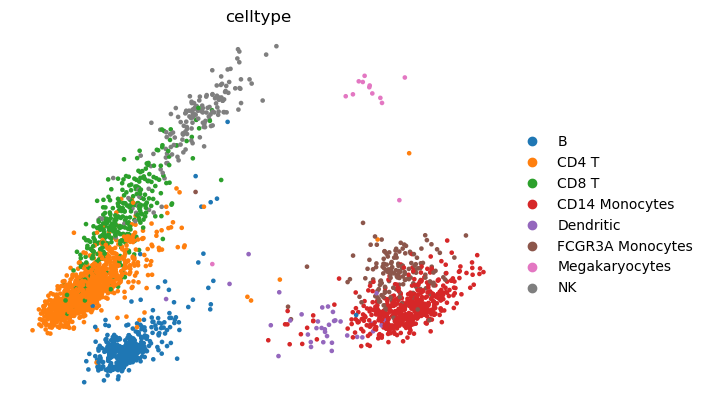

In [ ]:
sc.pl.pca(adata, color=['celltype',
                                ],
                                frameon=False,
                                ncols=2,
                                wspace=0.4)

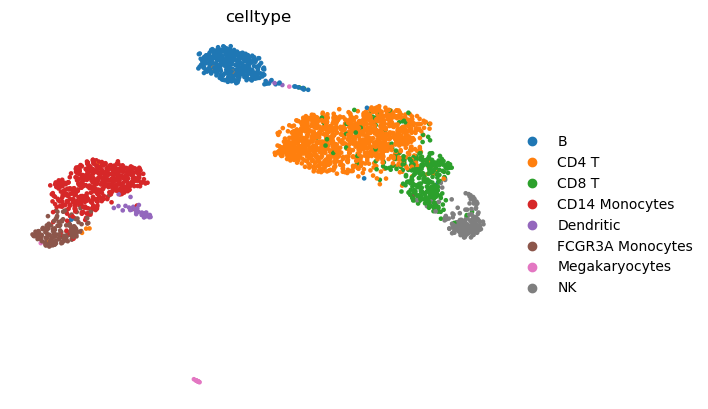

In [27]:
sc.pl.umap(adata, color=['celltype',
                                ],
                                frameon=False,
                                ncols=2,
                                wspace=0.4)

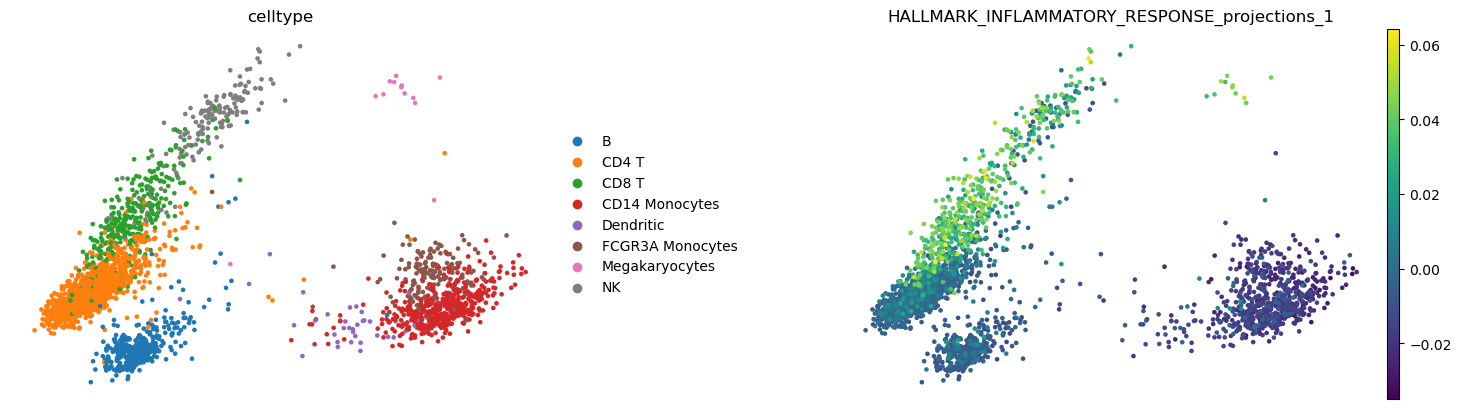

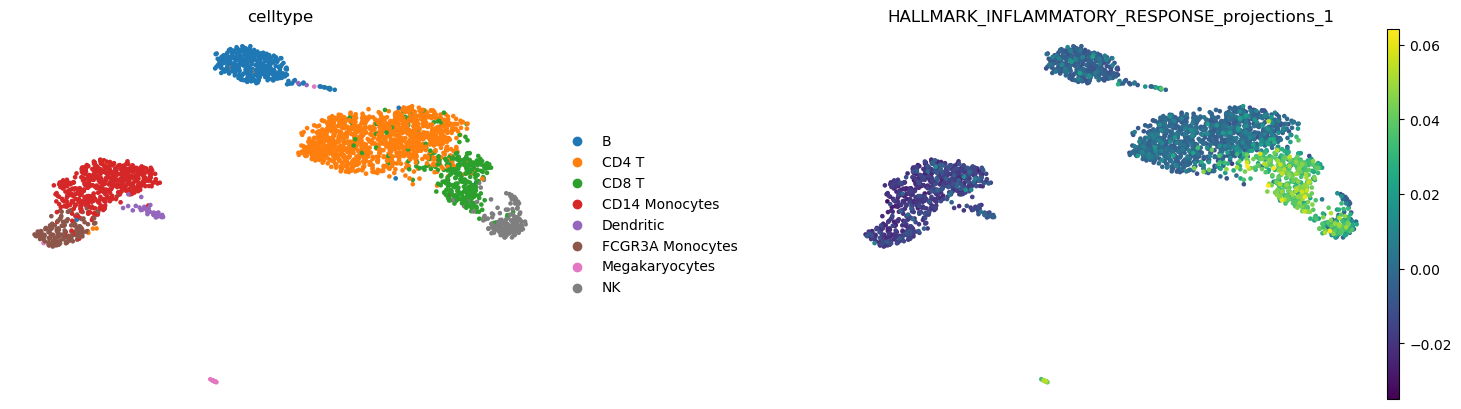

In [28]:
geneset_name = 'HALLMARK_INFLAMMATORY_RESPONSE'

roma.adata.obs[f'{geneset_name}_projections_1'] = roma.adata.uns['ROMA'][f'{geneset_name}'].svd.components_[0]
roma.adata.obs[f'{geneset_name}_projections_1_reverse'] = -1 * roma.adata.uns['ROMA'][f'{geneset_name}'].svd.components_[0]

GeneScores = pd.DataFrame(roma.adata.uns['ROMA'][f'{geneset_name}'].projections_1,
                index=roma.adata.uns['ROMA'][f'{geneset_name}'].subsetlist,
                columns=[f'{geneset_name}'])

sc.pl.pca(adata, color=['celltype',
                                f'{geneset_name}_projections_1'],
                                frameon=False,
                                ncols=2,
                                wspace=0.4)

sc.pl.umap(adata, color=['celltype',
                                f'{geneset_name}_projections_1'],
                                frameon=False,
                                ncols=2,
                                wspace=0.4)

In [29]:
GeneScores

,HALLMARK_INFLAMMATORY_RESPONSE
CXCL10,-0.170375
CCL2,-0.171711
CCL5,45.371983
FPR1,-3.665949
CCL20,0.093294
...,...
STAB1,-0.306725
IRF1,1.356791
ICAM4,-0.329889
P2RX4,-0.153761


In [17]:
# optional: to load pathway-genes dictionary 
genesets = roma.read_gmt_to_dict(roma.gmt)


### save and load results

### update the github tutorial branch